In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import time
import pydotplus
import pandas_profiling as pp
import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline
warnings.filterwarnings('ignore')

In [211]:
# Importing dataset
irisdata = pd.read_csv("Iris.csv")
irisdata = irisdata.drop_duplicates()
display(irisdata.head(10))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [212]:
irisdata.drop(labels='Id', axis=1, inplace=True)

In [147]:
pp.ProfileReport(irisdata)

Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,7.0 KiB
Average record size in memory,48.0 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


# <font color=red> Question 1</font>
#### Experiment with the Neural Network algorithm introduced in this lab to predict the class of the iris flower data
( iris.csv ).

In [213]:
irisdata_norm = irisdata[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].apply(lambda x:
                                                                                                  (x - x.min())/(x.max() - x.min()))
irisdata_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [214]:
irisdata_target = irisdata['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

# Concating both the features and Output value
irisdata = pd.concat([irisdata_norm, irisdata_target], axis=1)
irisdata.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,0.083333,0.458333,0.084746,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
77,0.666667,0.416667,0.677966,0.666667,1
63,0.500000,0.375000,0.627119,0.541667,1
40,0.194444,0.625000,0.050847,0.083333,0


In [215]:
np.random.seed(9)
mask = np.random.rand(len(irisdata)) < 0.8

irisdata_train = irisdata[mask]
irisdata_test = irisdata[~mask]

print("Length of training data : %s" % (len(irisdata_train)))
print("Length of testing data : %s" % (len(irisdata_test)))

Length of training data : 119
Length of testing data : 31


In [216]:
x = irisdata_train.values[:,:4]
targets = [[1,0,0], [0,1,0], [0,0,1]]
y = np.array([targets[int(x)] for x in irisdata_train.values[:,4]])

<font color=green> [1,0,0] = Iris-setosa <br> [0,1,0] = Iris-versicolor <br> [0,0,1] = Iris-virginica</font>

In [217]:
#w1 = matrix that contains the weights of each connecting layer between Input nodes and Hidden nodes. 
#value range =  -1 to 1 with an overall mean of 0.
hidden_layer_nodes = 5
input_layer_nodes = len(x[0])
w1 = 2 * np.random.random((input_layer_nodes, hidden_layer_nodes)) - 1

#w2 = weights of connection between the hidden layer and output layer.
#same property same as w1.
output_layer_nodes = len(y[0])
w2 = 2 * np.random.random((hidden_layer_nodes, output_layer_nodes)) - 1

In [218]:
# Sigmoid Function Definiton
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

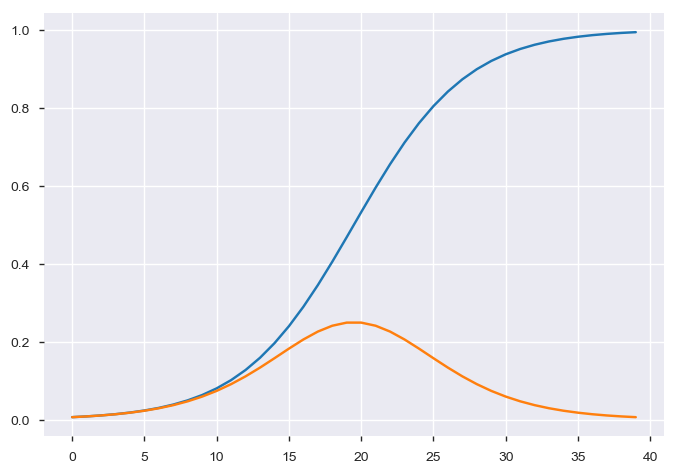

In [219]:
_x = np.linspace(-5, 5, 40)
plt.plot(sigmoid(_x))
plt.plot(sigmoid_derivative(sigmoid(_x)))
plt.show()

#### Adjust the value of learning rate and number of iteration value. Change to at least three different set of learning rate and iteration value.

#### <font color=blue> Baseline </font>  
#### Learning rate = 0.01, Iteration in range(2000000)

In [118]:
learning_rate = 0.01

#to keep track of error value in every iteration
learning_curve = []

# Setting upa for loop to tarin a network using input data
for itr in range(2000000):
    
    # Calculating the values of Nodes present in hidden layer using input layer and weight matrix (w1)
    l1 = sigmoid(np.dot(x, w1))
    
    # Calculating the value of output nodes using hidden layer nodes and weight matrix (w2)     
    l2 =  sigmoid(np.dot(l1, w2))
    
    # Error can be calculated by subtracting Actual output and Predicted output    
    error = (abs(y - l2)).mean()
    
    # Let's keep track of error value of each iteration    
    learning_curve.append(error)

    l2_delta = (y - l2) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(x.T, l1_delta) * learning_rate)

print("Error : %s" % (error))

Error : 0.005775702267072181


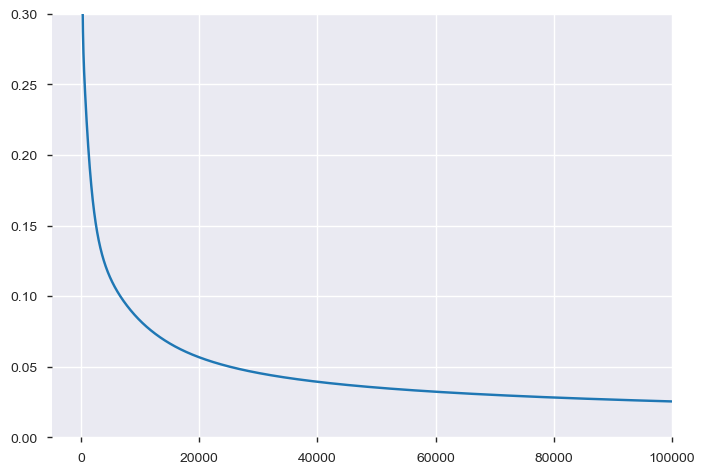

In [119]:
plt.axis([-5000, 100000, 0, 0.3])
plt.plot(learning_curve)
plt.show()

In [120]:
x = irisdata_test.values[:,:4]
y = np.array([targets[int(x)] for x in irisdata_test.values[:,4:5]])

l1 = sigmoid(np.dot(x, w1))
l2 = sigmoid(np.dot(l1, w2))
np.round(l2, 3)

array([[0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.998, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.998, 0.   , 0.   ],
       [0.999, 0.001, 0.   ],
       [0.999, 0.082, 0.   ],
       [0.998, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.003, 1.   , 0.   ],
       [0.002, 1.   , 0.   ],
       [0.001, 0.004, 0.998],
       [0.   , 0.   , 1.   ],
       [0.001, 0.004, 0.998],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.001, 0.489, 0.545],
       [0.   , 0.   , 1.   ],
       [0.   , 0.005, 0.997],
       [0.   , 0.077, 0.937],
       [0.   , 0.153, 0.86 ],
       [0.   , 0.139, 0.846],
       [0.   , 0.162, 0.858],
       [0.   , 0.118, 0.873],
       [0.   , 0.003, 0.998],
       [0.   , 0.014, 0.991]])

In [121]:
y_predicted = np.argmax(l2, axis=1)
y_actual = np.argmax(y, axis=1)
res = (y_predicted == y_actual)

accuracy = np.round(np.sum(res)/len(res) * 100, 3)

print("Out of %s values, %s are predicted correctly with an accuracy of %s" % (len(res), sum(res), accuracy))

Out of 31 values, 30 are predicted correctly with an accuracy of 96.774


#### <font color=blue> Increasing learning rate </font>  
##### Learning rate = 0.05, Iteration in range(2000000)

In [155]:
learning_rate = 0.05

#to keep track of error value in every iteration
learning_curve = []

# Setting upa for loop to tarin a network using input data
for itr in range(2000000):
    
    # Calculating the values of Nodes present in hidden layer using input layer and weight matrix (w1)
    l1 = sigmoid(np.dot(x, w1))
    
    # Calculating the value of output nodes using hidden layer nodes and weight matrix (w2)     
    l2 =  sigmoid(np.dot(l1, w2))
    
    # Error can be calculated by subtracting Actual output and Predicted output    
    error = (abs(y - l2)).mean()
    
    # Let's keep track of error value of each iteration    
    learning_curve.append(error)

    l2_delta = (y - l2) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(x.T, l1_delta) * learning_rate)

print("Error : %s" % (error))

Error : 0.0021933866088172955


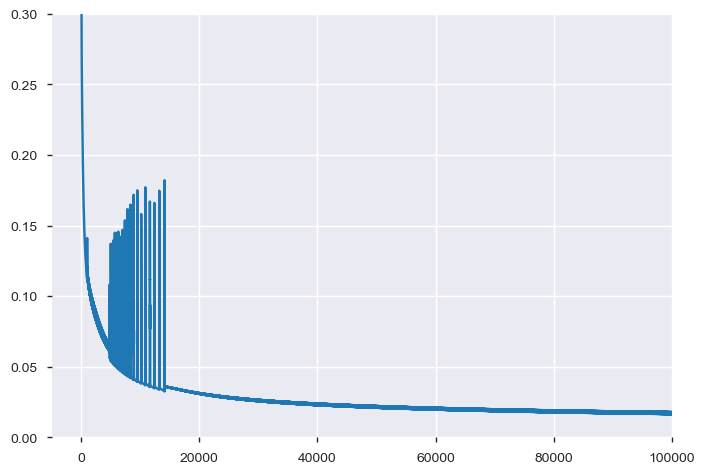

In [156]:
plt.axis([-5000, 100000, 0, 0.3])
plt.plot(learning_curve)
plt.show()

In [157]:
x = irisdata_test.values[:,:4]
y = np.array([targets[int(x)] for x in irisdata_test.values[:,4:5]])

l1 = sigmoid(np.dot(x, w1))
l2 = sigmoid(np.dot(l1, w2))
np.round(l2, 3)

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.002, 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.026, 0.   ],
       [1.   , 0.555, 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.001, 1.   , 0.   ],
       [0.   , 0.001, 0.999],
       [0.   , 0.   , 1.   ],
       [0.   , 0.037, 0.969],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.887, 0.104],
       [0.   , 0.   , 1.   ],
       [0.   , 0.001, 1.   ],
       [0.   , 0.022, 0.982],
       [0.   , 0.047, 0.959],
       [0.001, 0.732, 0.254],
       [0.   , 0.077, 0.931],
       [0.002, 0.93 , 0.061],
       [0.   , 0.   , 1.   ],
       [0.   , 0.004, 0.997]])

In [158]:
y_predicted = np.argmax(l2, axis=1)
y_actual = np.argmax(y, axis=1)
res = (y_predicted == y_actual)

accuracy = np.round(np.sum(res)/len(res) * 100, 3)

print("Out of %s values, %s are predicted correctly with an accuracy of %s" % (len(res), sum(res), accuracy))

Out of 31 values, 27 are predicted correctly with an accuracy of 87.097


##### Learning rate = 0.1, Iteration in range(2000000)

In [181]:
learning_rate = 0.1

#to keep track of error value in every iteration
learning_curve = []

# Setting upa for loop to train a network using input data
for itr in range(2000000):
    
    # Calculating the values of Nodes present in hidden layer using input layer and weight matrix (w1)
    l1 = sigmoid(np.dot(x, w1))
    
    # Calculating the value of output nodes using hidden layer nodes and weight matrix (w2)     
    l2 =  sigmoid(np.dot(l1, w2))
    
    # Error can be calculated by subtracting Actual output and Predicted output    
    error = (abs(y - l2)).mean()
    
    # Let's keep track of error value of each iteration    
    learning_curve.append(error)

    l2_delta = (y - l2) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(x.T, l1_delta) * learning_rate)

print("Error : %s" % (error))

Error : 0.0009863291971843996


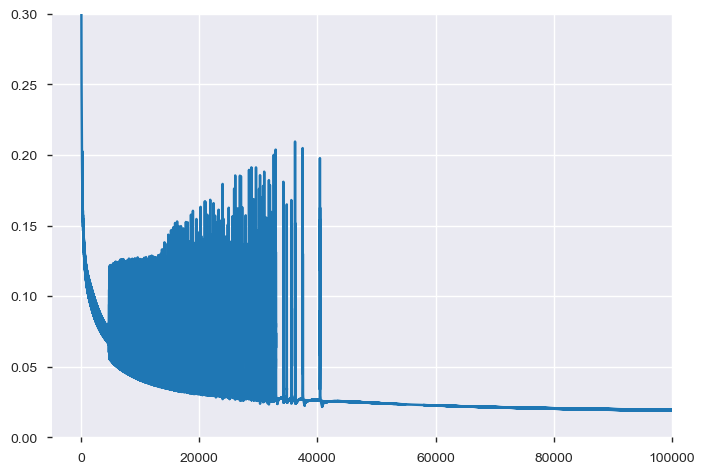

In [182]:
plt.axis([-5000, 100000, 0, 0.3])
plt.plot(learning_curve)
plt.show()

In [183]:
x = irisdata_test.values[:,:4]
y = np.array([targets[int(x)] for x in irisdata_test.values[:,4:5]])

l1 = sigmoid(np.dot(x, w1))
l2 = sigmoid(np.dot(l1, w2))
np.round(l2, 3)

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.001, 1.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.004, 0.999],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.936, 0.092],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.009, 0.996],
       [0.   , 0.043, 0.969],
       [0.   , 0.599, 0.216],
       [0.   , 0.037, 0.98 ],
       [0.001, 0.952, 0.013],
       [0.   , 0.   , 1.   ],
       [0.   , 0.001, 1.   ]])

In [184]:
y_predicted = np.argmax(l2, axis=1)
y_actual = np.argmax(y, axis=1)
res = (y_predicted == y_actual)

accuracy = np.round(np.sum(res)/len(res) * 100, 3)

print("Out of %s values, %s are predicted correctly with an accuracy of %s" % (len(res), sum(res), accuracy))

Out of 31 values, 27 are predicted correctly with an accuracy of 87.097


##### Learning rate = 0.5, Iteration in range(2000000)

In [207]:
learning_rate = 0.5

#to keep track of error value in every iteration
learning_curve = []

# Setting upa for loop to train a network using input data
for itr in range(2000000):
    
    # Calculating the values of Nodes present in hidden layer using input layer and weight matrix (w1)
    l1 = sigmoid(np.dot(x, w1))
    
    # Calculating the value of output nodes using hidden layer nodes and weight matrix (w2)     
    l2 =  sigmoid(np.dot(l1, w2))
    
    # Error can be calculated by subtracting Actual output and Predicted output    
    error = (abs(y - l2)).mean()
    
    # Let's keep track of error value of each iteration    
    learning_curve.append(error)

    l2_delta = (y - l2) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(x.T, l1_delta) * learning_rate)

print("Error : %s" % (error))

Error : 0.03293633537206993


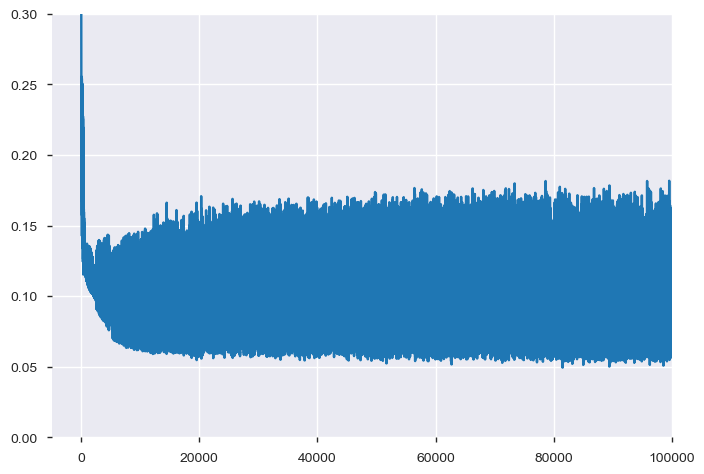

In [208]:
plt.axis([-5000, 100000, 0, 0.3])
plt.plot(learning_curve)
plt.show()

In [209]:
x = irisdata_test.values[:,:4]
y = np.array([targets[int(x)] for x in irisdata_test.values[:,4:5]])

l1 = sigmoid(np.dot(x, w1))
l2 = sigmoid(np.dot(l1, w2))
np.round(l2, 3)

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.048, 0.956],
       [0.   , 0.026, 0.979],
       [0.   , 0.342, 0.555],
       [0.   , 0.024, 0.98 ],
       [0.   , 0.02 , 0.984],
       [0.   , 0.303, 0.714],
       [0.   , 0.027, 0.976],
       [0.   , 0.036, 0.969],
       [0.   , 0.047, 0.956],
       [0.   , 0.327, 0.683],
       [0.   , 0.034, 0.971],
       [0.   , 0.057, 0.945],
       [0.   , 0.028, 0.976],
       [0.   , 0.027, 0.978],
       [0.   , 0.128, 0.85 ]])

In [210]:
y_predicted = np.argmax(l2, axis=1)
y_actual = np.argmax(y, axis=1)
res = (y_predicted == y_actual)

accuracy = np.round(np.sum(res)/len(res) * 100, 3)

print("Out of %s values, %s are predicted correctly with an accuracy of %s" % (len(res), sum(res), accuracy))

Out of 31 values, 30 are predicted correctly with an accuracy of 96.774


#### <font color=blue> Increasing iteration range </font>  
##### Learning rate = 0.01, Iteration in range(3000000)

In [194]:
learning_rate = 0.01

#to keep track of error value in every iteration
learning_curve = []

# Setting upa for loop to train a network using input data
for itr in range(3000000):
    
    # Calculating the values of Nodes present in hidden layer using input layer and weight matrix (w1)
    l1 = sigmoid(np.dot(x, w1))
    
    # Calculating the value of output nodes using hidden layer nodes and weight matrix (w2)     
    l2 =  sigmoid(np.dot(l1, w2))
    
    # Error can be calculated by subtracting Actual output and Predicted output    
    error = (abs(y - l2)).mean()
    
    # Let's keep track of error value of each iteration    
    learning_curve.append(error)

    l2_delta = (y - l2) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(x.T, l1_delta) * learning_rate)

print("Error : %s" % (error))

Error : 0.00460402915388753


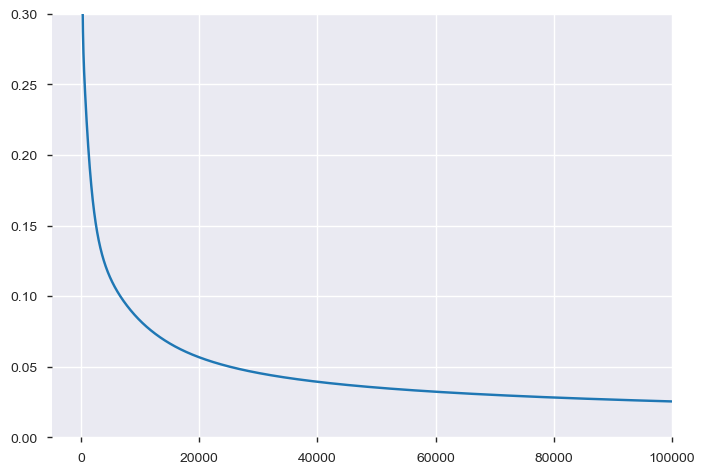

In [195]:
plt.axis([-5000, 100000, 0, 0.3])
plt.plot(learning_curve)
plt.show()

In [196]:
x = irisdata_test.values[:,:4]
y = np.array([targets[int(x)] for x in irisdata_test.values[:,4:5]])

l1 = sigmoid(np.dot(x, w1))
l2 = sigmoid(np.dot(l1, w2))
np.round(l2, 3)

array([[0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.106, 0.   ],
       [0.998, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.002, 1.   , 0.   ],
       [0.002, 1.   , 0.   ],
       [0.   , 0.002, 0.999],
       [0.   , 0.   , 1.   ],
       [0.   , 0.002, 0.999],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.001, 0.496, 0.534],
       [0.   , 0.   , 1.   ],
       [0.   , 0.003, 0.998],
       [0.   , 0.061, 0.95 ],
       [0.   , 0.128, 0.884],
       [0.   , 0.132, 0.856],
       [0.   , 0.14 , 0.877],
       [0.   , 0.117, 0.875],
       [0.   , 0.002, 0.999],
       [0.   , 0.009, 0.994]])

In [197]:
y_predicted = np.argmax(l2, axis=1)
y_actual = np.argmax(y, axis=1)
res = (y_predicted == y_actual)

accuracy = np.round(np.sum(res)/len(res) * 100, 3)

print("Out of %s values, %s are predicted correctly with an accuracy of %s" % (len(res), sum(res), accuracy))

Out of 31 values, 30 are predicted correctly with an accuracy of 96.774


##### Learning rate = 0.01, Iteration in range(5000000)

In [168]:
learning_rate = 0.01

#to keep track of error value in every iteration
learning_curve = []

# Setting upa for loop to tarin a network using input data
for itr in range(5000000):
    
    # Calculating the values of Nodes present in hidden layer using input layer and weight matrix (w1)
    l1 = sigmoid(np.dot(x, w1))
    
    # Calculating the value of output nodes using hidden layer nodes and weight matrix (w2)     
    l2 =  sigmoid(np.dot(l1, w2))
    
    # Error can be calculated by subtracting Actual output and Predicted output    
    error = (abs(y - l2)).mean()
    
    # Let's keep track of error value of each iteration    
    learning_curve.append(error)

    l2_delta = (y - l2) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(x.T, l1_delta) * learning_rate)

print("Error : %s" % (error))

Error : 0.0034636242692559728


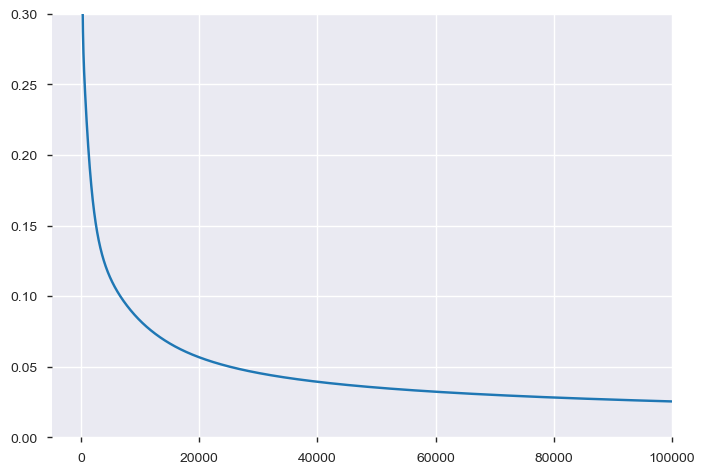

In [169]:
plt.axis([-5000, 100000, 0, 0.3])
plt.plot(learning_curve)
plt.show()

In [170]:
x = irisdata_test.values[:,:4]
y = np.array([targets[int(x)] for x in irisdata_test.values[:,4:5]])

l1 = sigmoid(np.dot(x, w1))
l2 = sigmoid(np.dot(l1, w2))
np.round(l2, 3)

array([[0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.147, 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.002, 1.   , 0.   ],
       [0.001, 1.   , 0.   ],
       [0.   , 0.001, 0.999],
       [0.   , 0.   , 1.   ],
       [0.   , 0.001, 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.001, 0.499, 0.527],
       [0.   , 0.   , 1.   ],
       [0.   , 0.001, 0.999],
       [0.   , 0.045, 0.963],
       [0.   , 0.102, 0.908],
       [0.   , 0.12 , 0.871],
       [0.   , 0.116, 0.898],
       [0.   , 0.111, 0.884],
       [0.   , 0.001, 0.999],
       [0.   , 0.005, 0.997]])

In [171]:
y_predicted = np.argmax(l2, axis=1)
y_actual = np.argmax(y, axis=1)
res = (y_predicted == y_actual)

accuracy = np.round(np.sum(res)/len(res) * 100, 3)

print("Out of %s values, %s are predicted correctly with an accuracy of %s" % (len(res), sum(res), accuracy))

Out of 31 values, 30 are predicted correctly with an accuracy of 96.774


##### Learning rate = 0.01, Iteration in range(7000000)

In [220]:
learning_rate = 0.01

#to keep track of error value in every iteration
learning_curve = []

# Setting upa for loop to tarin a network using input data
for itr in range(7000000):
    
    # Calculating the values of Nodes present in hidden layer using input layer and weight matrix (w1)
    l1 = sigmoid(np.dot(x, w1))
    
    # Calculating the value of output nodes using hidden layer nodes and weight matrix (w2)     
    l2 =  sigmoid(np.dot(l1, w2))
    
    # Error can be calculated by subtracting Actual output and Predicted output    
    error = (abs(y - l2)).mean()
    
    # Let's keep track of error value of each iteration    
    learning_curve.append(error)

    l2_delta = (y - l2) * sigmoid_derivative(l2)
    l1_delta = np.dot(l2_delta, w2.T) * sigmoid_derivative(l1)
    
    w2 += (np.dot(l1.T, l2_delta) * learning_rate)
    w1 += (np.dot(x.T, l1_delta) * learning_rate)

print("Error : %s" % (error))

Error : 0.002875760815795387


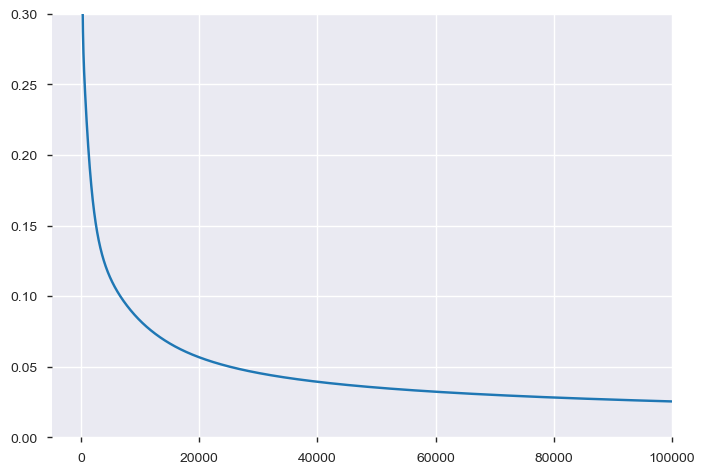

In [221]:
plt.axis([-5000, 100000, 0, 0.3])
plt.plot(learning_curve)
plt.show()

In [222]:
x = irisdata_test.values[:,:4]
y = np.array([targets[int(x)] for x in irisdata_test.values[:,4:5]])

l1 = sigmoid(np.dot(x, w1))
l2 = sigmoid(np.dot(l1, w2))
np.round(l2, 3)

array([[0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.182, 0.   ],
       [0.999, 0.   , 0.   ],
       [0.999, 0.   , 0.   ],
       [0.001, 1.   , 0.   ],
       [0.001, 1.   , 0.   ],
       [0.   , 0.001, 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.499, 0.526],
       [0.   , 0.   , 1.   ],
       [0.   , 0.001, 0.999],
       [0.   , 0.037, 0.97 ],
       [0.   , 0.088, 0.921],
       [0.   , 0.112, 0.881],
       [0.   , 0.102, 0.91 ],
       [0.   , 0.104, 0.892],
       [0.   , 0.001, 1.   ],
       [0.   , 0.003, 0.998]])

In [223]:
y_predicted = np.argmax(l2, axis=1)
y_actual = np.argmax(y, axis=1)
res = (y_predicted == y_actual)

accuracy = np.round(np.sum(res)/len(res) * 100, 3)

print("Out of %s values, %s are predicted correctly with an accuracy of %s" % (len(res), sum(res), accuracy))

Out of 31 values, 30 are predicted correctly with an accuracy of 96.774


#### Compare the accuracy value based on the specify parameter value. Do different value of learning rate and iteration value affect the performance of the algorithms?
There's no affect in performance when increasing the iteration value although the error reduced a bit in every iteration. The accuracy is at a constant 96.774% at every iteration.

Learning rate suffers in this case as it increases until 0.1 is used where it recorded the same accuracy as 0.01 learning rate

#### <br> Discuss your findings. Is higher learning rate and larger number of iteration better?
For Iris dataset, a larger number of iteration is neither better or worse as it has not impact on the performance of the algorithm. Larger learning rate does not constitute better performance as learning rate should neither be too small or too large. Neural Network algorith has to undergo a few trial and error to configure the most optimum lerning rate. The optimal learning rate here should be either 0.01 or 0.5. But I'm inclined to go for 0.01 as there seems to be noise introduced when the learning rate is 0.5 based on the learning curve.

<font color=green>Learning Rate Definition and Effect of Learning Rate</font>

"Learning rate controls how quickly or slowly a neural network model learns a problem. A neural network learns or approximates a function to best map inputs to outputs from examples in the training dataset.

The learning rate hyperparameter controls the rate or speed at which the model learns. Specifically, it controls the amount of apportioned error that the weights of the model are updated with each time they are updated, such as at the end of each batch of training examples.

Given a perfectly configured learning rate, the model will learn to best approximate the function given available resources (the number of layers and the number of nodes per layer) in a given number of training epochs (passes through the training data).

Generally, a large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train.

At extremes, a learning rate that is too large will result in weight updates that will be too large and the performance of the model (such as its loss on the training dataset) will oscillate over training epochs. Oscillating performance is said to be caused by weights that diverge (are divergent). A learning rate that is too small may never converge or may get stuck on a suboptimal solution.

Therefore, we should not use a learning rate that is too large or too small. Nevertheless, we must configure the model in such a way that on average a “good enough” set of weights is found to approximate the mapping problem as represented by the training dataset."
<br>Ref: https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# <font color=red> Question 2</font>
#### Compare the results obtained from this lab with the results obtained from Lab 5 using iris dataset. What can you deduce from your comparison? Which algorithms perform better and why?

SVM performs better in my opinion as Iris dataset is not that large and it could also handle both numerical and categorical attributes. SVM also compute faster and does not require a lot of hyperparameter tuning compared to Neural Network. Which algorithm performs better really depends on the dataset and its characteristics.  